# Data visualisation and Analytics-Primer
<hr>

>## Submitted by:
<div align="left"> Mohith Kumar Thummaluru - B180299CS<br>Avinash Samudrala - B180409CS</div>


### 1.Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import plotly as py
from plotly.offline import iplot
import cufflinks as cf
import geopandas as gpd
from sklearn.linear_model import LinearRegression

### 2.Reading sentinal SO2 data from given csv files

In [2]:

cities=['Bangalore','Delhi',"HYDER",'Kolkata','Mumbai']
city_names=['Bangalore','Delhi',"HYDER",'Kolkata','Mumbai']
filename='Sentinel SO2/SO2{}.csv'
df_li=[]
for city in cities:
   df_li.append(pd.read_csv(filename.format(city)))

i=0
for df in df_li:
    
    df["date"] = pd.to_datetime(df.date,dayfirst=True)
    df['year'] = pd.DatetimeIndex(df['date']).year
    df['month']=pd.DatetimeIndex(df['date']).month
    df['day']=pd.DatetimeIndex(df['date']).day
    df['city']=city_names[i]
    i=i+1


### 3.Aggregate statistics grouped by Months

In [3]:

for i in range(len(df_li)):
    cities[i] = df_li[i].groupby(["date"]).mean()
    cities[i]["month"] = cities[i].index.month
    cities[i]["year"] = cities[i].index.year
    cities[i]["day"] = cities[i].index.day
    cities[i]['city']=city_names[i]
    
monthly_means=[]
monthly_maxs=[]
monthly_mins=[]
for i in range(len(cities)):
    monthly_means.append(cities[i].groupby(pd.Grouper(freq="M")).mean())
    monthly_maxs.append(cities[i].groupby(pd.Grouper(freq="M")).max())
    monthly_mins.append(cities[i].groupby(pd.Grouper(freq="M")).min())
    

### 4.Plot graphs for Aggregate statistics

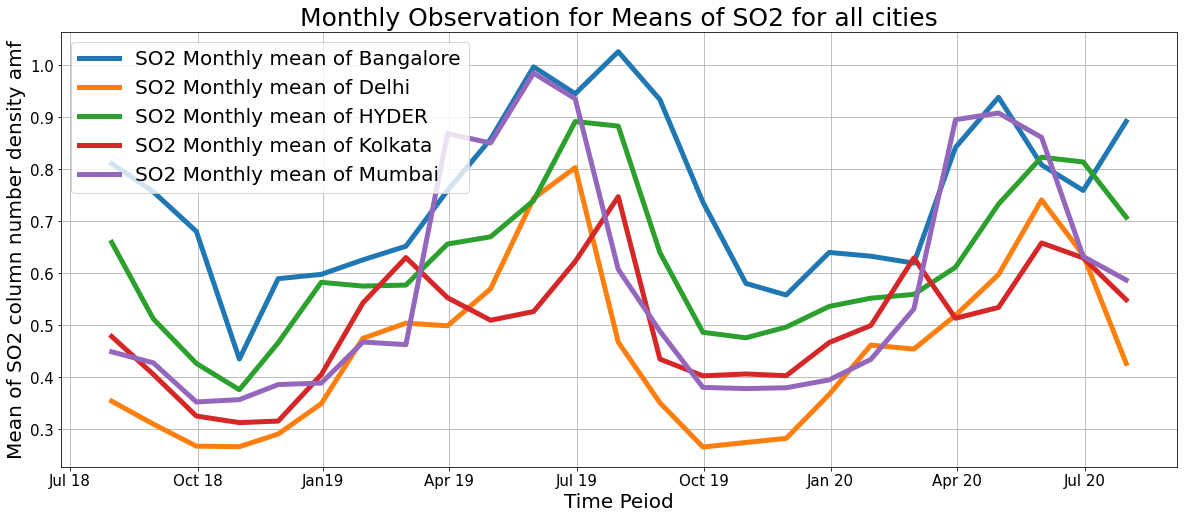

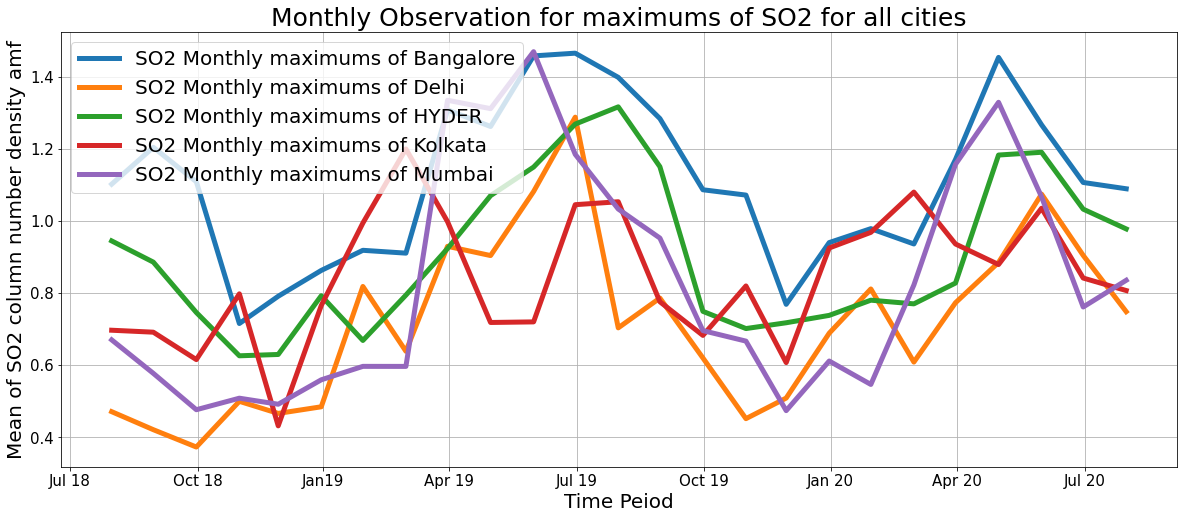

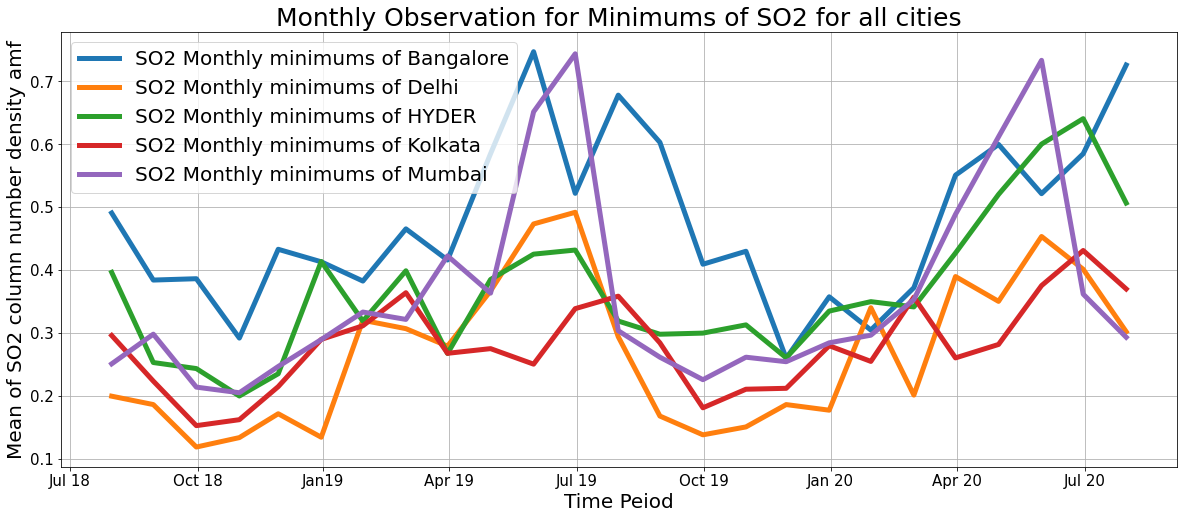

In [4]:
#plots of  means of 5 cities so2
plt.figure(figsize = (20,8))
for i in range(len(city_names)):
    plt.plot( monthly_means[i].index.tolist(),monthly_means[i]["mean"], linewidth = 5, label = "SO2 Monthly mean of "+city_names[i])
    plt.title("Monthly Observation for Means of SO2 for all cities",fontsize = 25)
    plt.xlabel("Time Peiod",fontsize= 20)
    plt.ylabel("Mean of SO2 column number density amf",fontsize= 20)
    xticklabels = ['Jul 18','Oct 18','Jan19','Apr 19','Jul 19', 'Oct 19', 'Jan 20', 'Apr 20', 'Jul 20', 'Oct 20']
    plt.gca().set_xticklabels(xticklabels, fontsize = 15)
    plt.setp(plt.gca().get_yticklabels(), fontsize=15)
    #plt.gca().set_yticklabels(plt.gca().get_yticklabels(),fontsize = 10)
    plt.legend(fontsize = 20)
    plt.grid()

#plots of  maximums of 5 cities so2
plt.figure(figsize = (20,8))
for i in range(len(city_names)):
    plt.plot( monthly_maxs[i].index.tolist(),monthly_maxs[i]["mean"], linewidth = 5, label = "SO2 Monthly maximums of "+city_names[i])
    plt.title("Monthly Observation for maximums of SO2 for all cities",fontsize = 25)
    plt.xlabel("Time Peiod",fontsize= 20)
    plt.ylabel("Mean of SO2 column number density amf",fontsize= 20)
    xticklabels = ['Jul 18','Oct 18','Jan19','Apr 19','Jul 19', 'Oct 19', 'Jan 20', 'Apr 20', 'Jul 20', 'Oct 20']
    plt.gca().set_xticklabels(xticklabels, fontsize = 15)
    plt.setp(plt.gca().get_yticklabels(), fontsize=15)
    #plt.gca().set_yticklabels(plt.gca().get_yticklabels(),fontsize = 10)
    plt.legend(fontsize = 20)
    plt.grid()

#plots of  minimums of 5 cities so2
plt.figure(figsize = (20,8))
for i in range(len(city_names)):
    plt.plot( monthly_mins[i].index.tolist(),monthly_mins[i]["mean"], linewidth = 5, label = "SO2 Monthly minimums of "+city_names[i])
    plt.title("Monthly Observation for Minimums of SO2 for all cities",fontsize = 25)
    plt.xlabel("Time Peiod",fontsize= 20)
    plt.ylabel("Mean of SO2 column number density amf",fontsize= 20)
    xticklabels = ['Jul 18','Oct 18','Jan19','Apr 19','Jul 19', 'Oct 19', 'Jan 20', 'Apr 20', 'Jul 20', 'Oct 20']
    plt.gca().set_xticklabels(xticklabels, fontsize = 15)
    plt.setp(plt.gca().get_yticklabels(), fontsize=15)
    #plt.gca().set_yticklabels(plt.gca().get_yticklabels(),fontsize = 10)
    plt.legend(fontsize = 20)
    plt.grid()

### 5.Ward-wise statistics for SO2 

In [5]:
for i in range(len(df_li)):
    city_wards = df_li[i].groupby(["WARD_NO","year"]).mean()
   # print(city_wards)
    #print(city_wards['mean'].describe())
    if(i==2):
        check = city_wards.index.get_level_values(0)
        dum=[]
        for k in check:
            k=str(k)
            k=[j for j in k.split() if j.isdigit()]
            dum.append(k[0])
        city_wards["WARD_NO"] = dum
        
    else:    
        city_wards["WARD_NO"] = city_wards.index.get_level_values(0)
    city_wards["Year"] = city_wards.index.get_level_values(1).astype(str)
    fig = px.scatter(city_wards, x="WARD_NO", y="mean", color="Year",template="plotly_dark",labels={"Ward_no":"Ward Number","mean" : "Mean of SO2 column number density amf"},title = ("Means of SO2 in all wards of {} over years").format(city_names[i]))
    fig.show()


### 6.Regression analysis for SO2 over Time period

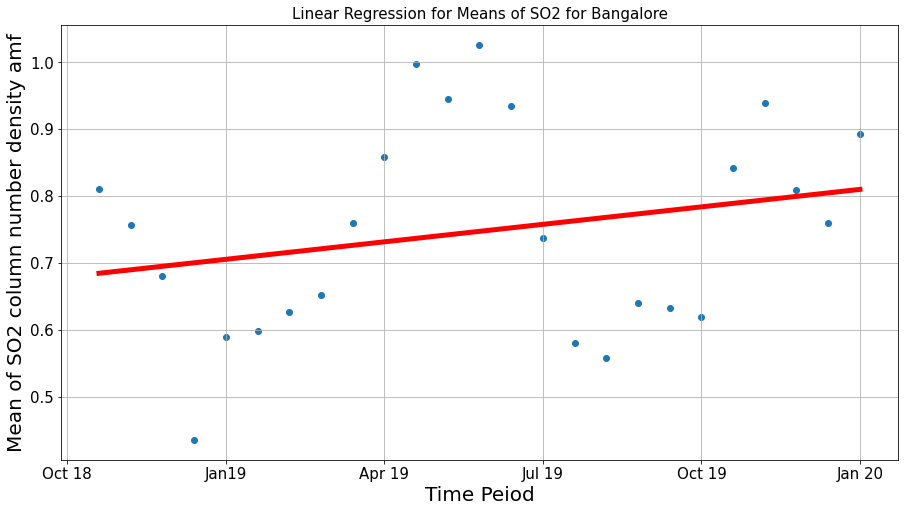

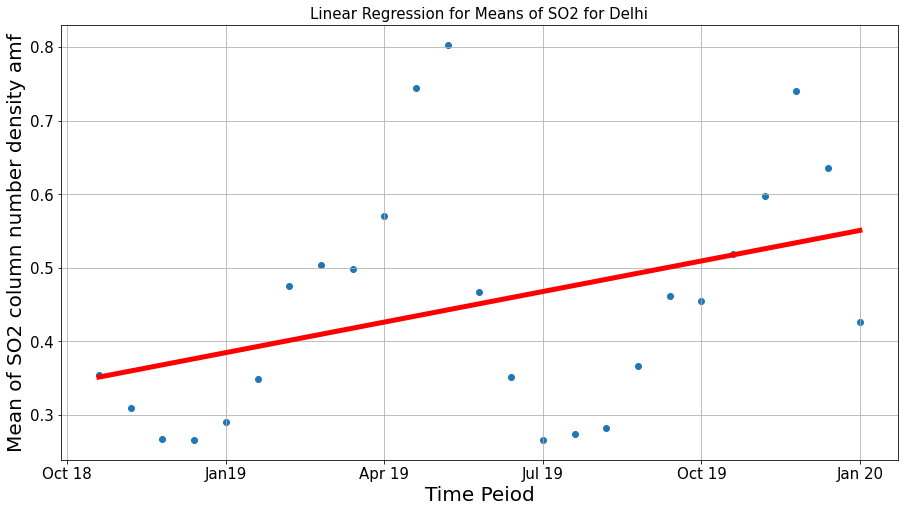

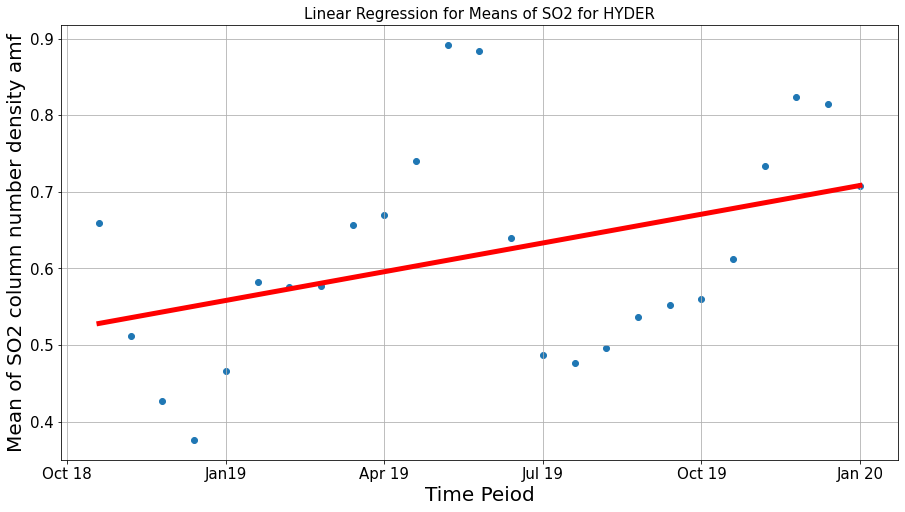

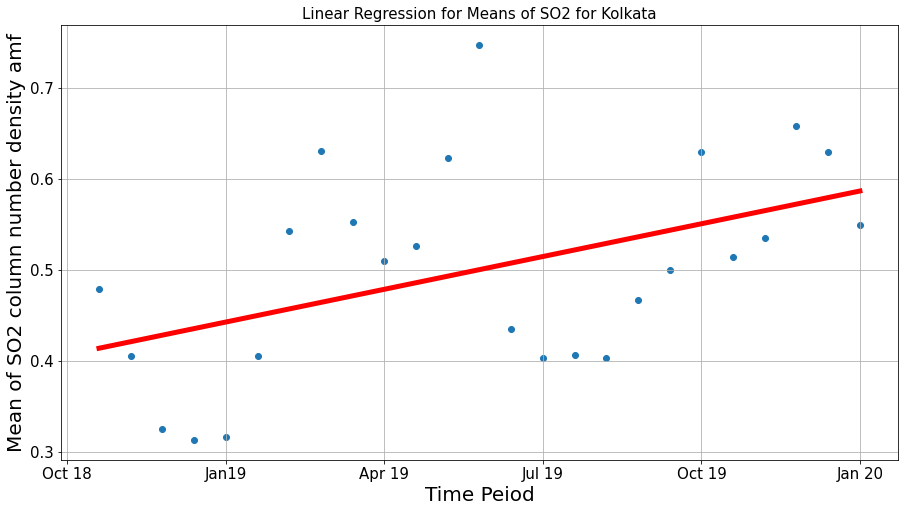

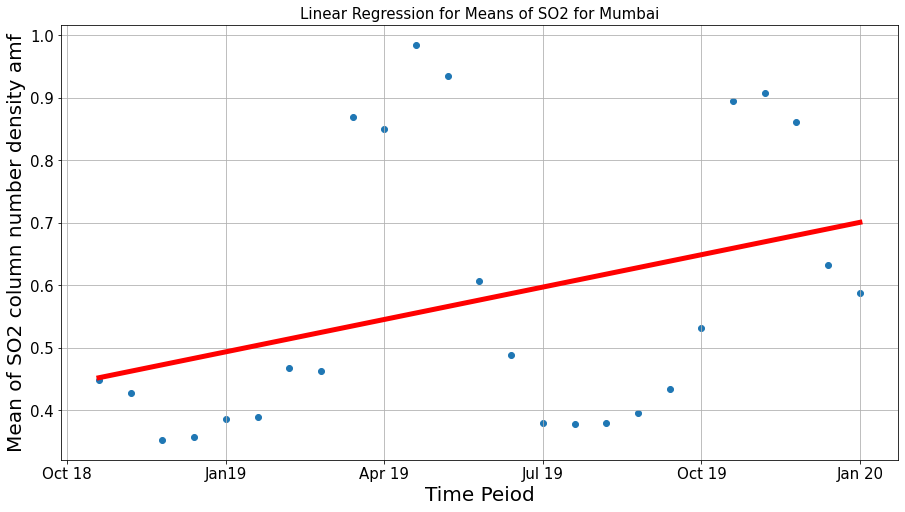

In [6]:

for i in range(len(monthly_means)):
    df2 = monthly_means[i]
    df2["mnth_id"] = list(j for j in range (1,26))
    X = pd.DataFrame(df2["mnth_id"])
    Y = pd.DataFrame(df2["mean"])

    lm = LinearRegression()
    lm.fit(X,Y)
    Y_pred = lm.predict(X)

    plt.figure(figsize = (15,8))
    plt.scatter(X,Y)
    plt.plot(X,Y_pred,color='red',lw=5,label="Predicted mean")
    plt.title("Linear Regression for Means of SO2 for {}".format(city_names[i]),fontsize = 15)
    plt.xlabel("Time Peiod",fontsize= 20)
    plt.ylabel("Mean of SO2 column number density amf",fontsize= 20)
    xticklabels = ['Jul 18','Oct 18','Jan19','Apr 19','Jul 19', 'Oct 19', 'Jan 20', 'Apr 20', 'Jul 20', 'Oct 20']
    plt.gca().set_xticklabels(xticklabels, fontsize = 15)
    plt.setp(plt.gca().get_yticklabels(), fontsize=15)
    plt.grid()


### 7.Choropleths

In [7]:
dum=df_li
city_merges=[]
paths=[]
maps=[]
for i in range(len(city_names)):
    city_merges.append(dum[i].groupby('WARD_NO',as_index=False)['mean'].mean())
    p='Shapefiles/'+city_names[i]+'_shape/'+city_names[i]+'.shp'
    maps.append(gpd.read_file(r'{}'.format(p)))
    
maps[0]["WARD_NO"]=maps[0]["WARD_NO"]
maps[1]["WARD_NO"]=maps[1]["Ward_No"]
maps[2]["WARD_NO"]=maps[2]["name"]
maps[3]["WARD_NO"]=maps[3]["WARD"].astype(int)
maps[4]["WARD_NO"]=maps[4]["gid"]


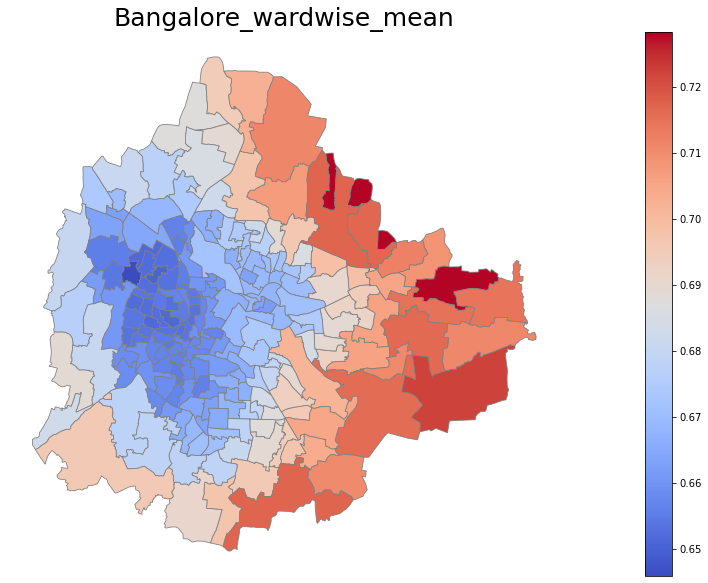

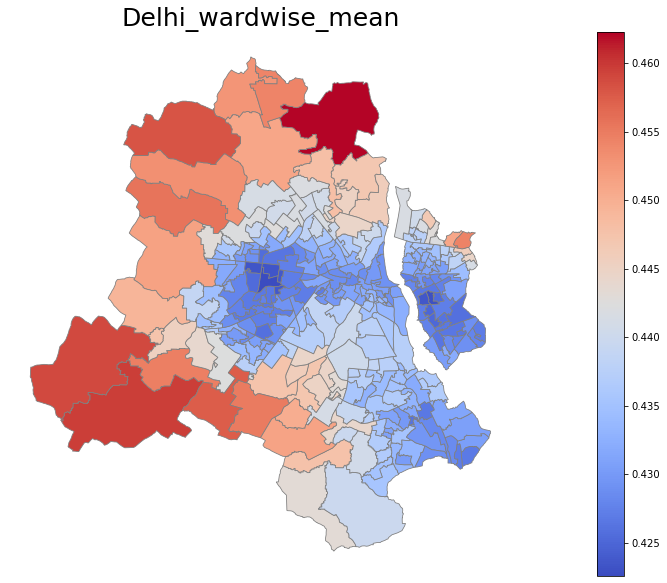

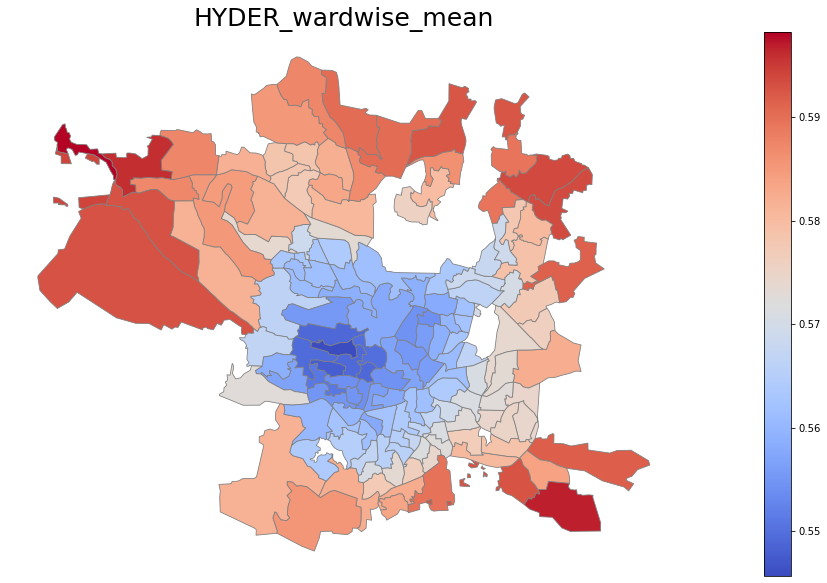

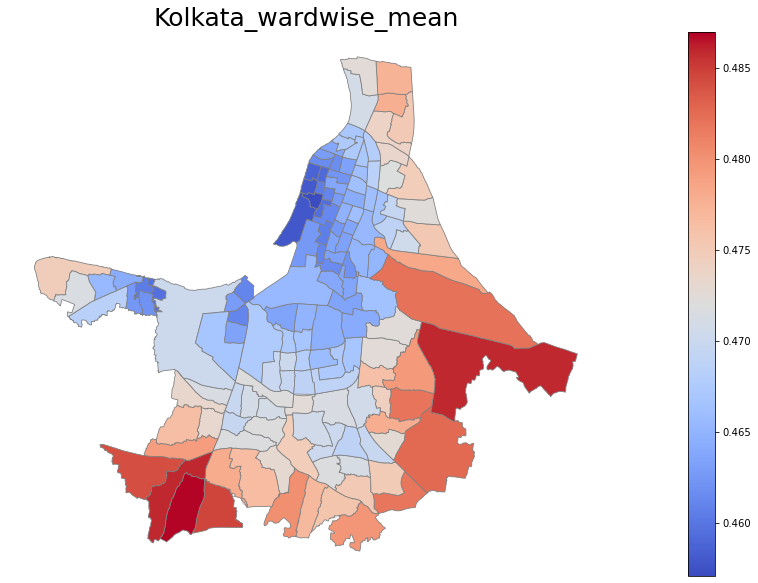

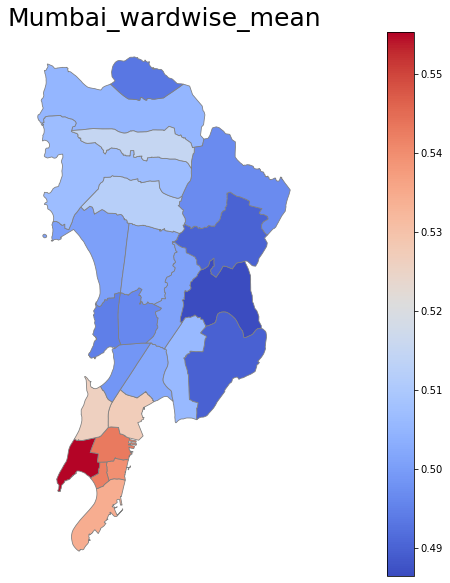

In [8]:
s=[]
for i in range(len(maps)):
    merged_map=maps[i].merge(city_merges[i],on=['WARD_NO'])
    variable='mean'
    vmin, vmax = merged_map["mean"].min(), merged_map["mean"].max()
    fig,ax=plt.subplots(1,figsize=(30,10))
    ax.axis('off')
    ax.set_title('{}_wardwise_mean'.format(city_names[i]),fontdict={'fontsize':'25'})
    sm = plt.cm.ScalarMappable(cmap='coolwarm',norm=plt.Normalize(vmin=vmin,vmax=vmax))
    sm.set_array([])
    fig.colorbar(sm)
    merged_map.plot(column=variable, cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.5', figsize = (5,15))
    plt.show()
    s.append(merged_map)


### 8.Include Sentinal pollution for Multi-variate analysis

In [9]:
mv_li=[]
mv_poll=[]


for i in range(5):
    filename='Pollution/'+city_names[i]+'.csv'
    mv_li.append(pd.read_csv(filename))
    
for mv in mv_li:
    
    mv['date']=pd.to_datetime(mv.date)
    mv['year']=pd.DatetimeIndex(mv['date']).year
    mv['month']=pd.DatetimeIndex(mv['date']).month
    mv=mv.groupby('date',as_index=False)['mean'].mean()
    mv['year']=pd.DatetimeIndex(mv['date']).year
    mv['pol_mean']=mv['mean']
    mv['month']=pd.DatetimeIndex(mv['date']).month
    #now make it monthly mean
    mv=mv.groupby(['month','year'],as_index=False)['pol_mean'].mean()
    mv_poll.append(mv)
 


In [10]:
dum=df_li
so2_cities=[]
for df in dum:
    df=df.groupby('date',as_index=False)['mean'].mean()
    df['year']=pd.DatetimeIndex(df['date']).year
    df['so2_mean']=df['mean']
    df['month']=pd.DatetimeIndex(df['date']).month
    #now make it monthly mean
    df=df.groupby(['month','year'],as_index=False)['so2_mean'].mean()
    so2_cities.append(df)
    


In [11]:
#merge setinal so2 and pollution monthly means for analysis
mv_merge=[]
for i in range(len(city_names)):
    temp=(so2_cities[i].merge(mv_poll[i],on=['month','year']))
    temp=temp.sort_values(by=['year','month'],ascending=True)
    temp['city']=city_names[i]
    mv_merge.append(temp)
   # print(mv_merge[i])


### 9.Include CO_density for multivariate analysis

In [12]:

co2_cities=[]
for i in city_names:
    path='CO_density/CO_'+i+'.csv'
    each=pd.read_csv(path)
    each['date']=pd.to_datetime(each.date,dayfirst=True)
    each=each.groupby('date')['mean'].mean()
    each=each.to_frame()
    each['date']=pd.DatetimeIndex(each.index)
    each['year']=pd.DatetimeIndex(each['date']).year
    each['CO_mean']=each['mean']
    each['month']=pd.DatetimeIndex(each['date']).month
    #now make it monthly mean
    each=each.groupby(['month','year'],as_index=False)['CO_mean'].mean()
    co2_cities.append(each)

### 10.Merging all 3 sentinal attributes of each cities

In [13]:

mv3_merge=[]
for i in range(len(mv_merge)):
    after=mv_merge[i].merge(co2_cities[i],on=['month','year'])
    mv3_merge.append(after)
#Note: Data of all the cities is combined for multivariate analysis.
combined=pd.concat(list(i for i in mv3_merge), ignore_index=False)
#print(combined)

### 11.Co-relation between SO2_mean and CO_mean using Pearson Co-relation test

In [14]:

from scipy.stats import * 
x=combined.so2_mean
y=combined.CO_mean

corr, _ = pearsonr(x,y) 
print('Pearsons correlation: %.3f' % corr) 


Pearsons correlation: -0.756


### 12.Joint Regression plot for SO2 and CO means

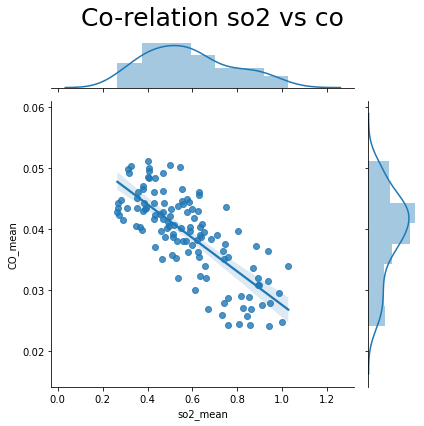

In [15]:
p=sns.jointplot(data=combined, x="so2_mean", y="CO_mean", kind="reg")
p.fig.suptitle("Co-relation so2 vs co",fontsize=25)
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.90)
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

### 13.Box plot for statistical analysis

In [16]:
data={'so2_mean':combined.so2_mean,'pollution_mean':combined.pol_mean,'(CO_mean)*25':combined.CO_mean*25}
df = pd.DataFrame(data, columns = ['so2_mean','pollution_mean','(CO_mean)*25'])
df.iplot(kind='box',title='Box plot of SO2,CO,pollution')


### 14.Plots for multivariate analysis of SO2 and CO over all cities

In [17]:
data_1={'so2_mean':combined.so2_mean,'pollution_mean':combined.pol_mean,'CO_mean':combined.CO_mean}
df = pd.DataFrame(data_1, columns = ['so2_mean','pollution_mean','CO_mean'])
df.iplot(x='so2_mean',y='CO_mean',mode='markers',size=temp.so2_mean*40,xTitle='SO2', yTitle='CO_Density',title='SO2 vs CO over all cities')

In [18]:

so2=combined.so2_mean
CO=list(i*10 for i in combined.CO_mean)
fig = go.Figure(data=[
    go.Bar(name='SO2_levels', x=city_names,y=so2),
    go.Bar(name='(CO_density)*10', x=city_names, y=CO)
])
fig.update_layout(barmode='group',title='City-wise SO2 vs CO')
fig.show()


### 15.City-wise Multivariate analysis 

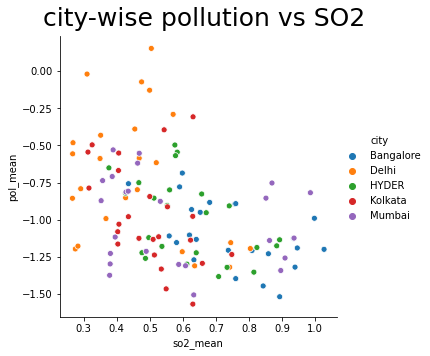

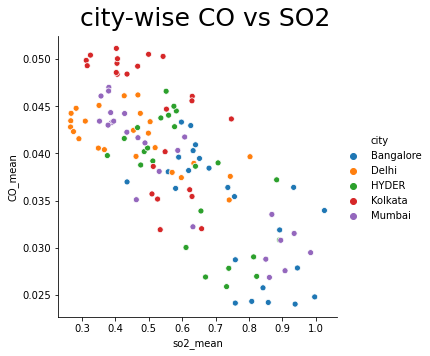

In [19]:

p=sns.relplot('so2_mean','pol_mean',data=combined,hue='city')
p.fig.suptitle("city-wise pollution vs SO2",fontsize=25)
p.fig.subplots_adjust(top=0.90)
p=sns.relplot('so2_mean','CO_mean',data=combined,hue='city')
p.fig.suptitle("city-wise CO vs SO2",fontsize=25)
p.fig.subplots_adjust(top=0.90)

### 16.Pair-plot to plot multiple pairwise bivariate distributions in a dataset.

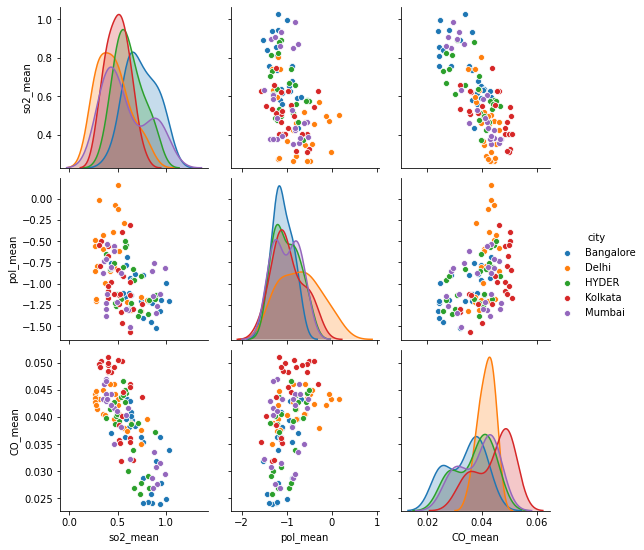

In [20]:
sns.pairplot(combined,hue='city',vars=['so2_mean','pol_mean','CO_mean'],diag_kind='kde')


### 17.Heatmaps for finding Co-relation between all multivariate variables

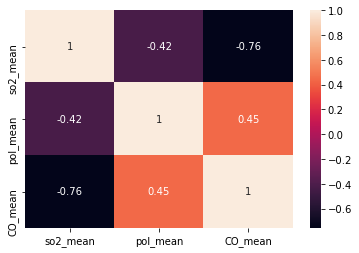

In [21]:
data={'so2_mean':combined.so2_mean,'pol_mean':combined.pol_mean,'CO_mean':combined.CO_mean}
df = pd.DataFrame(data, columns = ['so2_mean','pol_mean','CO_mean'])
sns.heatmap(df.corr(), annot = True)